# Ensemble Learning

__Ensemble Learning__ refers to the process of building multiple models and then combining them in a way that can produce better results than individual models. These individual models can be classifiers, regressors, or anything else that models data in some way. 

# Decision Trees

A __Decision Tree__ is a structure that allows us to split the dataset into branches and then make simple decision at each level. This will allow us to arrive at the final decision by walking down the tree. Decision trees are produced by training algorithms, which identify how we can split the data in the best possible way.


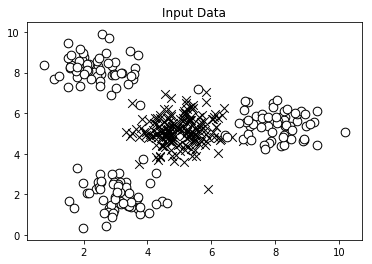

CLASSIFIER PERFORMANCE ON TRAINING DATASETS:

             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

CLASSIFIER PERFORMANCE ON TESTING DATASETS:

             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], 
            class_0[:, 1], 
            s=75, 
            facecolors='black', 
            edgecolors='black', 
            linewidth=1, 
            marker='x')
plt.scatter(class_1[:, 0], 
            class_1[:, 1], 
            s=75, 
            facecolors='white', 
            edgecolors='black', 
            linewidth=1, 
            marker='o')
plt.title('Input Data')
plt.show()

# Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Decision tree classifier
params = {'random_state':0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

# Predict
y_test_pred = classifier.predict(X_test)

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print('Classifier performance on training datasets:\n'.upper())
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))

print('Classifier performance on testing datasets:\n'.upper())
print(classification_report(y_test, y_test_pred, target_names=class_names))